<font size="6"><b>Image Panorama with Regression</b></font> 

Table of Contents
<div id="toc"></div>

## Load images

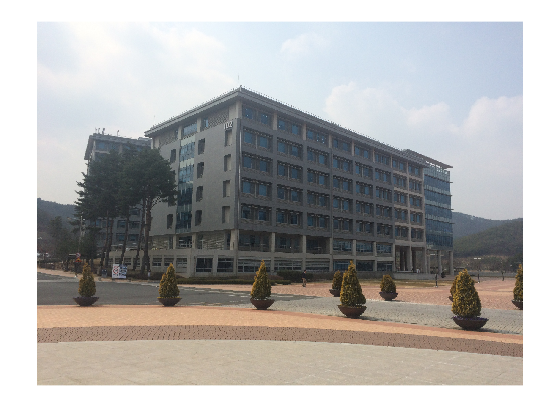

[Warning: Image is too big to fit on screen; displaying at 33%] 
[> In initSize at 71
  In imshow at 309
  In pymat_eval at 35
  In matlabserver at 24]

In [1]:
img01 = imread([pwd,'\image_files\c1.jpg']);
img02 = imread([pwd,'\image_files\c2.jpg']);
img03 = imread([pwd,'\image_files\c3.jpg']);

imshow(img01)

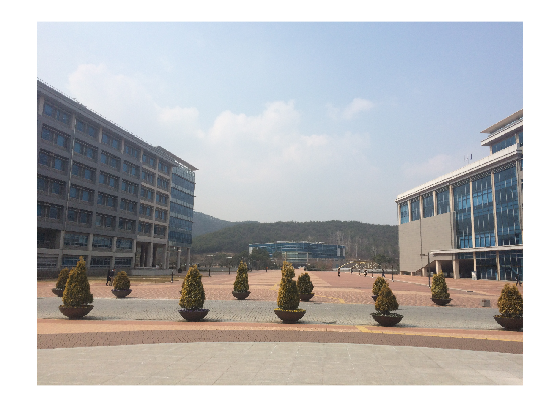

[Warning: Image is too big to fit on screen; displaying at 33%] 
[> In initSize at 71
  In imshow at 309
  In pymat_eval at 35
  In matlabserver at 24]

In [2]:
imshow(img02)

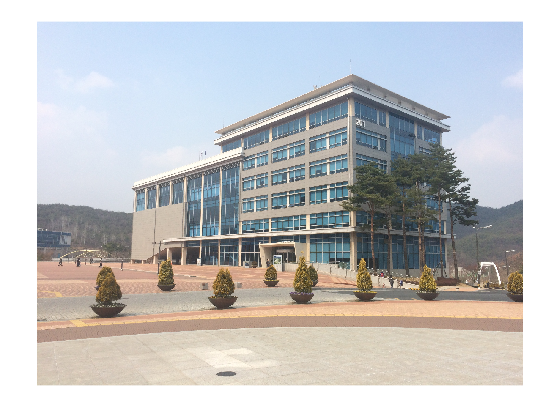

[Warning: Image is too big to fit on screen; displaying at 33%] 
[> In initSize at 71
  In imshow at 309
  In pymat_eval at 35
  In matlabserver at 24]

In [3]:
imshow(img03)

Three images of UNIST

<img src="./image_files/three_pictures2.png", width = 800>

# Panorama

- Any wide-angle view or representation of a physical space
- images with horizontally elongated fields of view


- if manually move around

<img src="./image_files/manual_panorama2.png", width = 800>

- but we want to do the following

<img src ='image_files\Capture2.PNG', width = 800>

- idea: projecting images onto a common plane

<img src="./image_files/mosaic.png", width = 500>

- Camera rotating about its center

<img src="./image_files/Hx.png", width = 500>

 - Two image planes are related by a homography $H$

 Do not worry about a homgraphy transformation. (out of this course's scope)
 
 
 $$ \begin{bmatrix}
x'\\y'\\1
\end{bmatrix}  \sim \begin{bmatrix}
\omega x'\\\omega y'\\\omega
\end{bmatrix} = \begin{bmatrix}
            a & b & c \\
            d & e & f \\            
            g & h & 1 \end{bmatrix}
\begin{bmatrix}
x\\y\\1
\end{bmatrix}            
            $$

- For the advanced learner, watch the following online lecture by Prof. Aaron Bobick

In [4]:
%%html
<iframe 
width="560" height="315" src="https://www.youtube.com/embed/pU4NorC7lb0" frameborder="0" allowfullscreen>
</iframe>

- Pictorial explantion of how to make a panorama
<br>
<img src="./image_files/panorama_reference.png", width = 400>

## Estimation of homography H

$$ X' = HX $$

where $ X $ and $X'$ are position vectors of key points, and $ H $ is a Perspective Transformation

__Goal: we need to estimate homography $H$ via matching potins between two images__


-----

$$\begin{bmatrix}
    x' \\
    y' \\
    1 \end{bmatrix}
    \sim
    \begin{bmatrix}
    \omega x' \\
    \omega y' \\
    \omega \end{bmatrix}
    =
    \begin{bmatrix}
    \theta_{1} & \theta_{2} & \theta_{3} \\
    \theta_{4} & \theta_{5} & \theta_{6} \\
    \theta_{7} & \theta_{8} & 1 \end{bmatrix} 
    \begin{bmatrix}
    x\\
    y\\
    1 
\end{bmatrix}$$
    
<br>
$$ 
\begin{align*}
x' &= \frac{\theta_1 x+\theta_2 y+\theta_3}{\theta_7 x+\theta_8 y+1} \\
y' &= \frac{\theta_4 x+\theta_5 y+\theta_6}{\theta_7 x+\theta_8 y+1}
\end{align*}
$$
<br>
$$ 
\begin{align*}
\theta_1 x+\theta_2 y+\theta_3 -\theta_7 x'x-\theta_8 x'y-x' &= 0 \\
\theta_4 x+\theta_5 y+\theta_6 -\theta_7 y'x-\theta_8 y'y-y' &= 0 
\end{align*}
$$

<br>
For $m$ pairs of matching potins

- $ \Phi $ is a feature matrix

$$ \Phi = \begin{bmatrix}
            x_{1} & y_{1} & 1 & 0 & 0 & 0 & -x'_{1}x_{1} & -x'_{1}y_{1}\\
            0 & 0 & 0 & x_{1} & y_{1} & 1 & -y'_{1}x_{1} & -y'_{1}y_{1}\\
            \vdots &\vdots &\vdots &\vdots &\vdots &\vdots &\vdots &\vdots\\
            x_{m} & y_{m} & 1 & 0 & 0 & 0 & -x'_{m}x_{m} & -x'_{m}y_{m}\\
            0 & 0 & 0 & x_{m} & y_{m} & 1 & -y'_{m}x_{m} & -y'_{m}y_{m}\end{bmatrix} $$
         
         
           
- $ \theta $ is a column vector for unknown parameters in a perspective transformation $H$



$$ \theta = \begin{bmatrix}
            \theta_{1} \\
            \theta_{2} \\
            \theta_{3} \\
            \theta_{4} \\
            \theta_{5} \\
            \theta_{6} \\
            \theta_{7} \\
            \theta_{8}
            \end{bmatrix} $$
            
- $b$ is a column vector for corresponding positions in the base image

$$ b = \begin{bmatrix}
            x'_{1} \\ 
            y'_{1} \\
            x'_{2} \\
            y'_{2}  \\
            \vdots \\
            x'_{m} \\
            y'_{m} \end{bmatrix} $$
                    
------            


- It ends up becoming a linear regression problem

$$ \min\limits_{\theta} \lVert \Phi\theta - b \rVert _2^2 $$

$$ \theta^* = (\Phi^T\Phi)^{-1}\Phi^T b $$


## Find key points between two images
 
- Suppose these matching points are given.
    - We have manually found the matching points for you, although there is a technique to do this.     


- pos1 and pos2 are matching points between img01 and img02
- pos3 and pos4 are matching points between img02 and img03

In [5]:
load([pwd,'\image_files\keypoints.mat']);
whos

Name          Size                   Bytes  Class     Attributes

  img01      2448x3264x3            23970816  uint8               
  img02      2448x3264x3            23970816  uint8               
  img03      2448x3264x3            23970816  uint8               
  pos1          2x8                      128  double              
  pos2          2x8                      128  double              
  pos3          2x8                      128  double              
  pos4          2x8                      128  double

## Visualization of key points

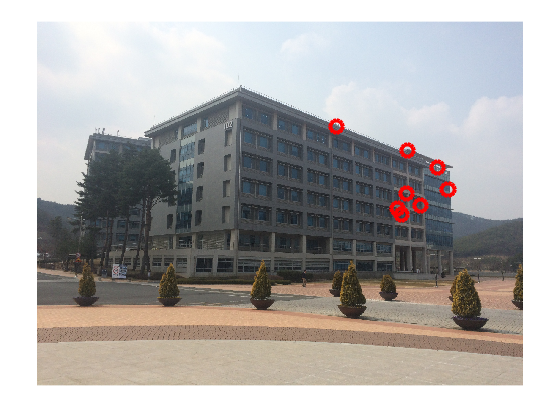

pos1 =

        2497        2016        2429        2488        2580        2455        2764        2694
         870         709        1260        1160        1236        1296        1128         981

[Warning: Image is too big to fit on screen; displaying at 33%] 
[> In initSize at 71
  In imshow at 309
  In pymat_eval at 35
  In matlabserver at 24]

In [6]:
pos1

imshow(img01), hold on
plot(pos1(1,:),pos1(2,:),'ro','linewidth',2), hold off

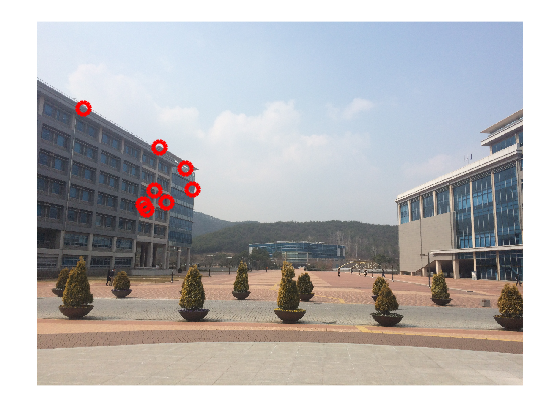

pos2 =

         824         311         717         788         869         739        1048        1000
         849         584        1230        1135        1218        1268        1132         986

[Warning: Image is too big to fit on screen; displaying at 33%] 
[> In initSize at 71
  In imshow at 309
  In pymat_eval at 35
  In matlabserver at 24]

In [7]:
pos2

imshow(img02), hold on
plot(pos2(1,:),pos2(2,:),'ro','linewidth',2), hold off

In [8]:
% Perspective homography for image 1 and image 2

Phi01 = [];
newpos01 = [];
for i = 1:size(pos1,2)
    Phi01 = [Phi01;
            pos1(1,i) pos1(2,i) 1 0 0 0 -pos2(1,i)*pos1(1,i) -pos2(1,i)*pos1(2,i);
            0 0 0 pos1(1,i) pos1(2,i) 1 -pos2(2,i)*pos1(1,i) -pos2(2,i)*pos1(2,i)];
    newpos01 = [newpos01; pos2(1,i); pos2(2,i)];
end

perspective_theta = inv(Phi01'*Phi01)*Phi01'*newpos01;
perspective_theta = [perspective_theta; 1];
perspective_theta = reshape(perspective_theta,3,3);

% Perspective homography 2 for image 2 and image 3

Phi02 = [];
newpos02 = [];
for i = 1:size(pos3,2)
    Phi02 = [Phi02;
            pos3(1,i) pos3(2,i) 1 0 0 0 -pos4(1,i)*pos3(1,i) -pos4(1,i)*pos3(2,i);
            0 0 0 pos3(1,i) pos3(2,i) 1 -pos4(2,i)*pos3(1,i) -pos4(2,i)*pos3(2,i)];
    newpos02 = [newpos02; pos4(1,i); pos4(2,i)];
end

perspective_theta2 = inv(Phi02'*Phi02)*Phi02'*newpos02;
perspective_theta2 = [perspective_theta2; 1];
perspective_theta2 = reshape(perspective_theta2,3,3);

[Warning: Matrix is close to singular or badly scaled. Results may be inaccurate. RCOND =  7.164971e-19.] 
[  In pymat_eval at 35
  In matlabserver at 24] 
[Warning: Matrix is close to singular or badly scaled. Results may be inaccurate. RCOND =  6.150830e-18.] 
[  In pymat_eval at 35
  In matlabserver at 24]

## Image warping

- Again, do not worry about the image warping (outside lecture's scope)

In [9]:
% Define affine matrix for imagewarp
transbase = affine2d(eye(3));
trans = projective2d(perspective_theta);
trans2 = projective2d(perspective_theta2);

imageSize = size(img02);
[xlim(1,:), ylim(1,:)] = outputLimits(trans, [1 imageSize(2)], [1 imageSize(1)]);
[xlim2(1,:), ylim2(1,:)] = outputLimits(trans2, [1 imageSize(2)], [1 imageSize(1)]);

xMin = min([1; xlim(:); xlim2(:)]);
xMax = max([imageSize(2); xlim(:); xlim2(:)]);

yMin = min([1; ylim(:); ylim2(:)]);
yMax = max([imageSize(1); ylim(:); ylim2(:)]);

% Width and height of panorama.
width  = round(xMax - xMin);
height = round(yMax - yMin);

% Create a 2-D spatial reference object defining the size of the panorama
xLimits = [xMin xMax];
yLimits = [yMin yMax];
panoramaView = imref2d([height width], xLimits, yLimits);

% Imagewarp
warpedImage = imwarp(img01, trans, 'OutputView', panoramaView);
warpedImage2 = imwarp(img03,trans2,'OutputView', panoramaView);
baseimage = imwarp(img02,transbase,'OutputView',panoramaView);

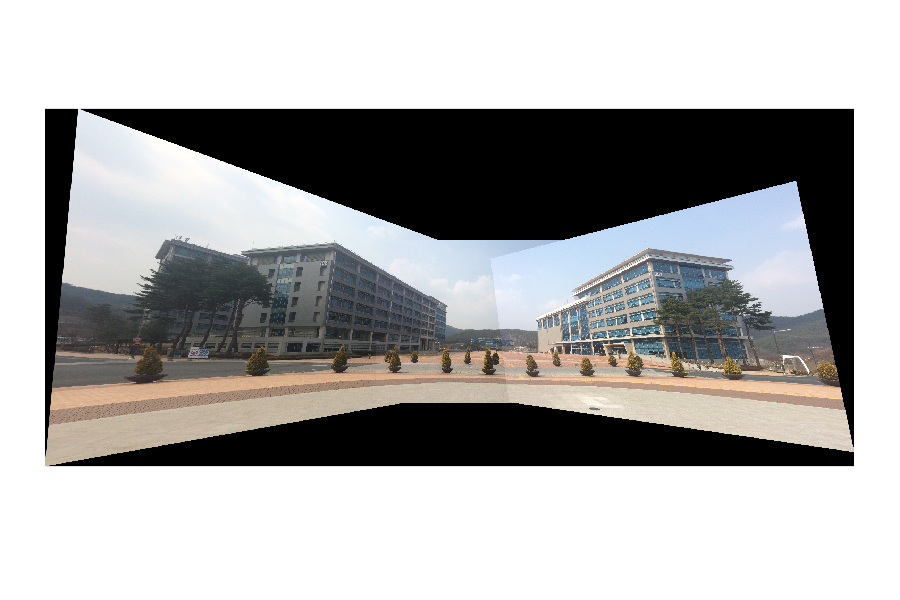

[Warning: Image is too big to fit on screen; displaying at 13%] 
[> In initSize at 71
  In imshow at 309
  In pymat_eval at 35
  In matlabserver at 24]

In [10]:
%plot -s 900,600

% Image Stich

imshow(double(max(max(warpedImage,baseimage), warpedImage2))/255);

In [11]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>